# ACRA results analysis

In [496]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In this document, we generate the relevant metrics for each experiment. In particular, we use as relevant metrics the accuracy, the average utility gain, FPR and FNR.

##  Auxiliar functions

We define here the relevant metrics to be calculated for each experiment.

In [497]:
def postolabel(posterior, ut):
    aux = np.dot(ut, posterior.transpose())   
    return(np.argmax(aux, axis = 0))

In [498]:
def avgUt(y_true, y_pred, ut):
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    return( float(sum(ut[y_pred,y_true])) / float(len(y_true) ))

In [499]:
def acc(y_true, y_pred):
    return(accuracy_score(y_true, y_pred))

In [500]:
def FPR(y_true, y_pred):
    a = confusion_matrix(y_true, y_pred)
    return(float(a[0,1]) / float(sum(a[0,:])))

In [501]:
def FNR(y_true, y_pred):
    a = confusion_matrix(y_true, y_pred)
    return(float(a[1,0])/ float(sum((a[1,:]))))

## Results dataframe generation

For a given `N` and give `var`, this function reads the corresponding experiment, computes all relevant metrics, and returns a dataframe with the results.

In [532]:
def getMetrics(N, var):


    ut10 = [0, -1, -5, -10]
    columns = ["N", "var", "Ut01", "NBC_Acc", "ACRA_Acc", "NB_Acc", "NBC_AvgUt", "ACRA_AvgUt", "NB_AvgUt",\
               "NBC_FPR", "ACRA_FPR", "NB_FPR", "NBC_FNR", "ACRA_FNR", "NB_FNR"]
    resultsdf = pd.DataFrame(data=None, columns=columns)

    name = "BEN" + str(N) + "var" + str(var) + ".csv"
    dataPath = "results/"
    data = pd.read_csv(dataPath + name)

    for i in range(len(ut01)):

        if ut01[i] == 0:
            ut = np.array([[1,0],[0,1]])
            NB_label = postolabel(data[["NBpost0", "NBpost1"]].values, ut)
            NBC_label = postolabel(data[["NBCpost0", "NBCpost1"]].values, ut)
            ACRA_label = postolabel(data[["ACRApost0", "ACRApost1"]].values, ut)

            resultsdf.loc[i] = [N, var, ut01[i], acc(data.spam.values, NBC_label), acc(data.spam.values, ACRA_label), \
                          acc(data.spam.values, NB_label), avgUt(data.spam.values, NBC_label, ut), \
                          avgUt(data.spam.values, ACRA_label, ut), avgUt(data.spam.values, NB_label, ut), \
                          FPR(data.spam.values, NBC_label), FPR(data.spam.values, ACRA_label),\
                          FPR(data.spam.values, NB_label), FNR(data.spam.values, NBC_label), \
                          FNR(data.spam.values, ACRA_label), FNR(data.spam.values, NB_label)]
        else:

            ut = np.array([[1,-1],[ut01[i],1]])
            NB_label = postolabel(data[["NBpost0", "NBpost1"]].values, ut)
            NBC_label = postolabel(data[["NBCpost0", "NBCpost1"]].values, ut)
            ACRA_label = postolabel(data[["ACRApost0", "ACRApost1"]].values, ut)

            resultsdf.loc[i] = [N, var, ut01[i], acc(data.spam.values, NBC_label), acc(data.spam.values, ACRA_label), \
                          acc(data.spam.values, NB_label), avgUt(data.spam.values, NBC_label, ut), \
                          avgUt(data.spam.values, ACRA_label, ut), avgUt(data.spam.values, NB_label, ut), \
                          FPR(data.spam.values, NBC_label), FPR(data.spam.values, ACRA_label),\
                          FPR(data.spam.values, NB_label), FNR(data.spam.values, NBC_label), \
                          FNR(data.spam.values, ACRA_label), FNR(data.spam.values, NB_label)]


    return(resultsdf)



In [533]:
getMetrics(0,10.0)

,N,var,Ut01,NBC_Acc,ACRA_Acc,NB_Acc,NBC_AvgUt,ACRA_AvgUt,NB_AvgUt,NBC_FPR,ACRA_FPR,NB_FPR,NBC_FNR,ACRA_FNR,NB_FNR
0,0.0,10.0,0.0,0.890530,0.911381,0.618593,0.890530,0.911381,0.618593,0.067606,0.033803,0.067606,0.176871,0.176871,0.886621
1,0.0,10.0,-1.0,0.890530,0.911381,0.618593,0.781060,0.822763,0.237185,0.067606,0.033803,0.067606,0.176871,0.176871,0.886621
2,0.0,10.0,-5.0,0.887924,0.903562,0.621199,0.654214,0.741095,0.120765,0.049296,0.026761,0.049296,0.213152,0.208617,0.909297
3,0.0,10.0,-10.0,0.886186,0.903562,0.618593,0.514335,0.689835,-0.020851,0.046479,0.021127,0.046479,0.222222,0.217687,0.920635


## Compute metrics for all experiments

We compute the metrics for all experiments and write the results.

In [534]:
N = range(10)
var = [1.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0]

result = getMetrics(0, 1.0)
for i in N:
    for j in var:
        if not (i == 0 and j == 1.0):
            tmp = getMetrics(i, j)
            result = result.append(tmp, ignore_index=True)

result.to_csv("results/whole.csv")

## Take mean values

We compute the average value of the ten experiments done under different training-test splits.

In [535]:
means = result.groupby(['var', 'Ut01'], as_index=False)["NBC_Acc", "ACRA_Acc", "NB_Acc", "NBC_AvgUt", "ACRA_AvgUt", "NB_AvgUt",\
               "NBC_FPR", "ACRA_FPR", "NB_FPR", "NBC_FNR", "ACRA_FNR", "NB_FNR"].mean()

means.to_csv("results/means.csv")

## Analysis Plots

In [541]:
def scatterPlot(x,y1,y2,y3,ylim1, ylim2, l, xl, yl, t):


    f,(ax,ax2) = plt.subplots(2,1,sharex=True, facecolor='w')
    sns.set_style("whitegrid")
    # plot the same data on both axes
    ax.plot(x, y1, color = sns.xkcd_rgb["pale red"])
    ax.plot(x, y2, color = sns.xkcd_rgb["denim blue"])
    ax2.plot(x, y3, color = sns.xkcd_rgb["medium green"])

    ax.legend(labels=[l[0], l[1]])
    ax2.legend(handles=ax2.lines[::len(ut0["ACRA_Acc"])+1], labels=[l[2]])
    #ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])
    plt.gcf().autofmt_xdate()
    ax2.set(xlabel=xl)
    ax2.set_ylabel(yl)
    ax2.yaxis.set_label_coords(0.04, 0.47, transform=fig.transFigure)

    f.suptitle(t) 

    # zoom-in / limit the view to different portions of the data
    ax2.set_ylim(ylim1[0], ylim1[1])
    ax.set_ylim(ylim2[0], ylim2[1])

    # hide the spines between ax and ax2
    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax.xaxis.tick_top()
    ax.tick_params(labeltop='off')  # don't put tick labels at the top
    ax2.xaxis.tick_bottom()

    # This looks pretty good, and was fairly painless, but you can get that
    # cut-out diagonal lines look with just a bit more work. The important
    # thing to know here is that in axes coordinates, which are always
    # between 0-1, spine endpoints are at these locations (0,0), (0,1),
    # (1,0), and (1,1).  Thus, we just need to put the diagonals in the
    # appropriate corners of each of our axes, and so long as we use the
    # right transform and disable clipping.

    d = .015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

    # What's cool about this is that now if we vary the distance between
    # ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
    # the diagonal lines will move accordingly, and stay right at the tips
    # of the spines they are 'breaking'

    return(plt)

In [582]:
def scatterPlot2(x,y1,y2,y3,ylim1, ylim2, l, xl, yl, t):


    f,(ax,ax2) = plt.subplots(2,1,sharex=True, facecolor='w')
    sns.set_style("whitegrid")
    # plot the same data on both axes
    ax2.plot(x, y1, color = sns.xkcd_rgb["pale red"])
    ax2.plot(x, y2, color = sns.xkcd_rgb["denim blue"])
    ax.plot(x, y3, color = sns.xkcd_rgb["medium green"])

    ax2.legend(labels=[l[0], l[1]])
    ax.legend(labels=[l[2]])
    #ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])
    plt.gcf().autofmt_xdate()
    ax2.set(xlabel=xl)
    ax2.set_ylabel(yl)
    ax2.yaxis.set_label_coords(0.04, 0.47, transform=fig.transFigure)

    f.suptitle(t) 

    # zoom-in / limit the view to different portions of the data
    ax.set_ylim(ylim1[0], ylim1[1])
    ax2.set_ylim(ylim2[0], ylim2[1])

    # hide the spines between ax and ax2
    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.xaxis.tick_top()
    ax2.tick_params(labeltop='off')  # don't put tick labels at the top
    ax2.xaxis.tick_bottom()

    # This looks pretty good, and was fairly painless, but you can get that
    # cut-out diagonal lines look with just a bit more work. The important
    # thing to know here is that in axes coordinates, which are always
    # between 0-1, spine endpoints are at these locations (0,0), (0,1),
    # (1,0), and (1,1).  Thus, we just need to put the diagonals in the
    # appropriate corners of each of our axes, and so long as we use the
    # right transform and disable clipping.

    d = .015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

    # What's cool about this is that now if we vary the distance between
    # ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
    # the diagonal lines will move accordingly, and stay right at the tips
    # of the spines they are 'breaking'

    return(plt)

In [543]:
def scatterPlot3(x,y1,y2,y3,l, xl, yl, t):


    f,ax2 = plt.subplots(1,1,sharex=True, facecolor='w')
    sns.set_style("whitegrid")
    # plot the same data on both axes
    ax2.plot(x, y1, color = sns.xkcd_rgb["pale red"])
    ax2.plot(x, y2, color = sns.xkcd_rgb["denim blue"])
    ax2.plot(x, y3, color = sns.xkcd_rgb["medium green"])

    ax2.legend(labels=[l[0], l[1],l[2]])
    plt.gcf().autofmt_xdate()
    ax2.set(xlabel=xl)
    ax2.set_ylabel(yl)
    #ax.yaxis.set_label_coords(0.04, 0.47, transform=fig.transFigure)

    f.suptitle(t) 



    return(plt)

### Plot accuracies for different utilities

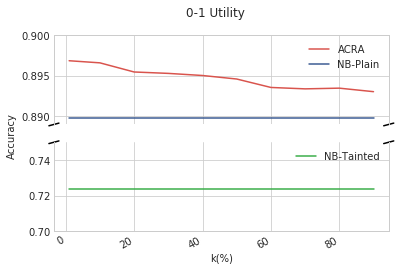

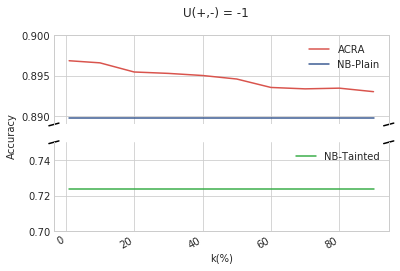

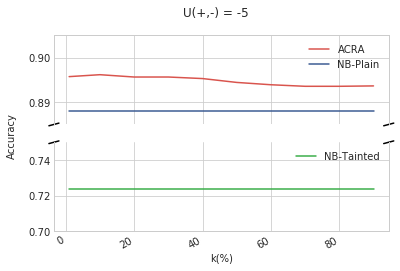

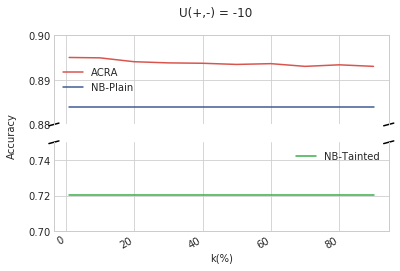

In [566]:
ut0 = means[means.Ut01 == 0.0]
ut0["var"]

p = scatterPlot(ut0["var"],ut0["ACRA_Acc"],ut0["NBC_Acc"],ut0["NB_Acc"],[0.70,0.75], \
            [0.889,0.90], ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "Accuracy",\
               "0-1 Utility")

p.show()
p.savefig("accut0.png")

#########################################################################################
#########################################################################################


ut1 = means[means.Ut01 == -1.0]
ut1["var"]
q = scatterPlot(ut1["var"],ut1["ACRA_Acc"],ut1["NBC_Acc"],ut1["NB_Acc"],[0.70,0.75], \
            [0.889,0.90], ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "Accuracy",\
               "U(+,-) = -1")

q.show()
q.savefig("accut1.png")
#########################################################################################
#########################################################################################


ut5 = means[means.Ut01 == -5.0]
ut5["var"]
r = scatterPlot(ut5["var"],ut5["ACRA_Acc"],ut5["NBC_Acc"],ut1["NB_Acc"],[0.70,0.75], \
            [0.885,0.905], ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "Accuracy",\
               "U(+,-) = -5")

r.show()
r.savefig("accut5.png")
#########################################################################################
#########################################################################################


ut10 = means[means.Ut01 == -10.0]
ut10["var"]
s = scatterPlot(ut10["var"],ut10["ACRA_Acc"],ut10["NBC_Acc"],ut10["NB_Acc"],[0.70,0.75], \
            [0.88,0.90], ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "Accuracy",\
               "U(+,-) = -10")

s.show()

### Plot average utility 

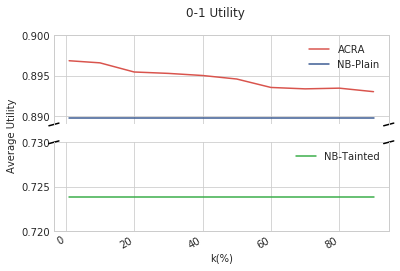

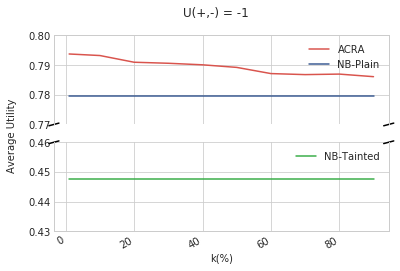

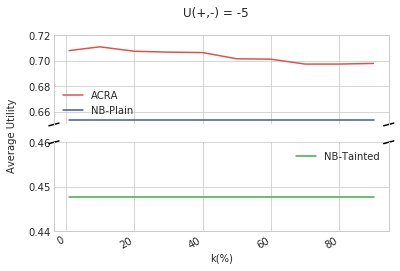

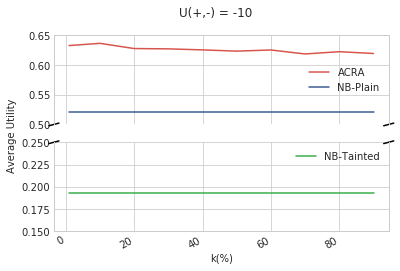

In [585]:
p = scatterPlot(ut0["var"],ut0["ACRA_AvgUt"],ut0["NBC_AvgUt"],ut0["NB_AvgUt"],[0.72,0.73], \
            [0.889,0.90], ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "Average Utility",\
               "0-1 Utility")

p.show()

#########################################################################################
#########################################################################################


q = scatterPlot(ut1["var"],ut1["ACRA_AvgUt"],ut1["NBC_AvgUt"],ut1["NB_AvgUt"],[0.43,0.46], \
            [0.77,0.8], ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "Average Utility",\
               "U(+,-) = -1")

q.show()
#########################################################################################
#########################################################################################


r = scatterPlot(ut5["var"],ut5["ACRA_AvgUt"],ut5["NBC_AvgUt"],ut1["NB_AvgUt"],[0.44,0.46], \
            [0.65,0.72], ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "Average Utility",\
               "U(+,-) = -5")

r.show()
#########################################################################################
#########################################################################################

s = scatterPlot(ut10["var"],ut10["ACRA_AvgUt"],ut10["NBC_AvgUt"],ut10["NB_AvgUt"],[0.15,0.25], \
            [0.5,0.65], ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "Average Utility",\
               "U(+,-) = -10")

s.show()

### Plot FNR for different Utilities

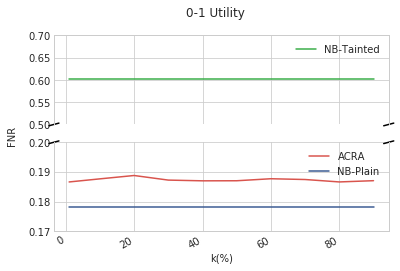

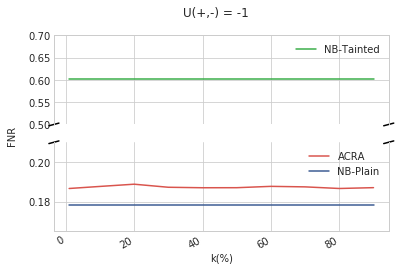

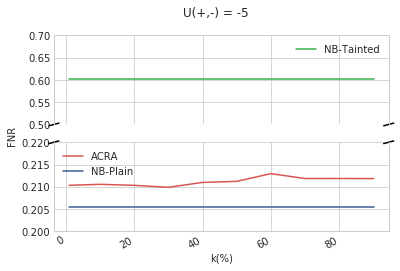

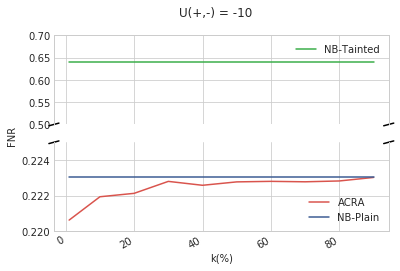

In [586]:
p = scatterPlot2(ut0["var"],ut0["ACRA_FNR"],ut0["NBC_FNR"],ut0["NB_FNR"],[0.5,0.7], \
            [0.17,0.2], ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "FNR",\
               "0-1 Utility")

p.show()

#########################################################################################
#########################################################################################


q = scatterPlot2(ut1["var"],ut1["ACRA_FNR"],ut1["NBC_FNR"],ut1["NB_FNR"],[0.5,0.7], \
            [0.165,0.21], ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "FNR",\
               "U(+,-) = -1")

q.show()
#########################################################################################
#########################################################################################


r = scatterPlot2(ut5["var"],ut5["ACRA_FNR"],ut5["NBC_FNR"],ut1["NB_FNR"],[0.5,0.7], \
            [0.2,0.22], ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "FNR",\
               "U(+,-) = -5")

r.show()
#########################################################################################
#########################################################################################

s = scatterPlot2(ut10["var"],ut10["ACRA_FNR"],ut10["NBC_FNR"],ut10["NB_FNR"],[0.5,0.7], \
            [0.220,0.225], ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "FNR",\
               "U(+,-) = -10")

s.show()

### Plot FPR for different Utilities

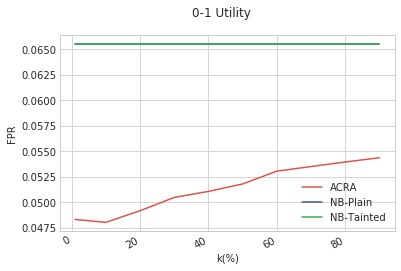

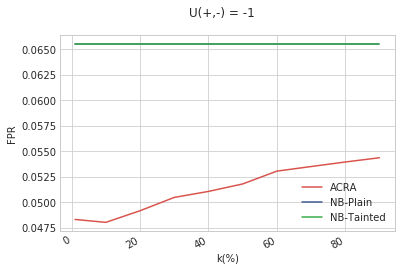

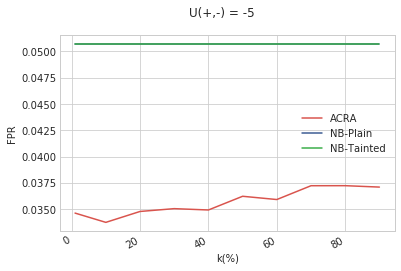

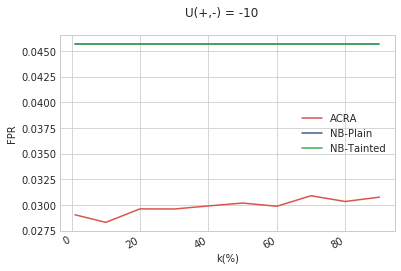

In [587]:
p = scatterPlot3(ut0["var"],ut0["ACRA_FPR"],ut0["NBC_FPR"],ut0["NB_FPR"],\
             ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "FPR","0-1 Utility")

p.show()

#########################################################################################
#########################################################################################


q = scatterPlot3(ut1["var"],ut1["ACRA_FPR"],ut1["NBC_FPR"],ut1["NB_FPR"], \
            ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "FPR","U(+,-) = -1")

q.show()
#########################################################################################
#########################################################################################


r = scatterPlot3(ut5["var"],ut5["ACRA_FPR"],ut5["NBC_FPR"],ut5["NB_FPR"], \
            ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "FPR","U(+,-) = -5")

r.show()
#########################################################################################
#########################################################################################

s = scatterPlot3(ut10["var"],ut10["ACRA_FPR"],ut10["NBC_FPR"],ut10["NB_FPR"], \
            ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "FPR","U(+,-) = -10")

s.show()
